# Imports

In [115]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


# Gather Data


In [2]:
boston_dataset = load_boston()

In [10]:
type(boston_dataset)



sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
boston_dataset.data.shape


(506, 13)

In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data Exploration

In [29]:
# Creating pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names) 
# adding the target variable as another column 'PRICE'
data['PRICE'] = boston_dataset.target
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [30]:
# data['PRICE'][2] = np.NaN
# data['PRICE'].head()

In [32]:

pd.isnull(data).any() # returns true if there is a missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:

data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [33]:
data.count() # counts data in individual columns

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Visualizing Data

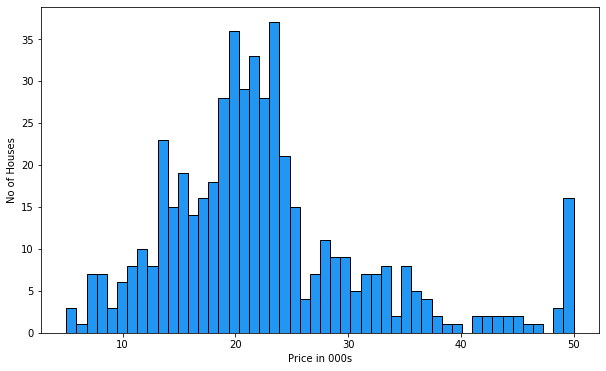

In [34]:
# histogram of house prices
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s')
plt.ylabel('No of Houses')
plt.show()

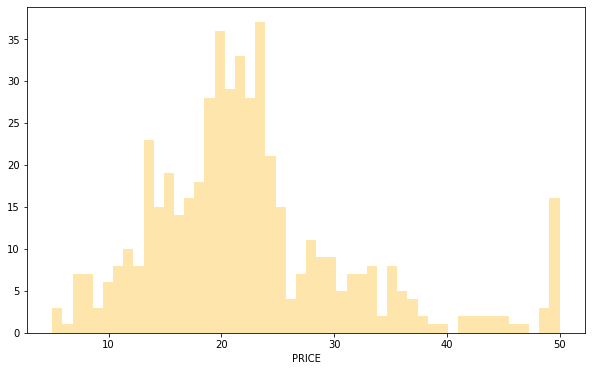

In [35]:
# seaborn chart
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, hist=True, kde=False,color='#fbc02d')
plt.show()

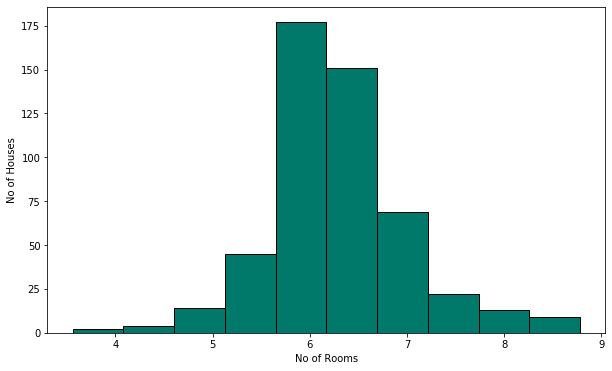

In [43]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black',color='#00796b')
plt.ylabel('No of Houses')
plt.xlabel('No of Rooms')
plt.show()


In [44]:
mn = data['RM'].mean()
print(f'Average number of rooms in boston: {round(data.RM.mean(),2)} rooms')

Average number of rooms in boston: 6.28 rooms


In [45]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

# Investigating RAD (Accessibility to Highways)

In [47]:
data['RAD'].unique().shape

(9,)

In [49]:
frequency = data['RAD'].value_counts()
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

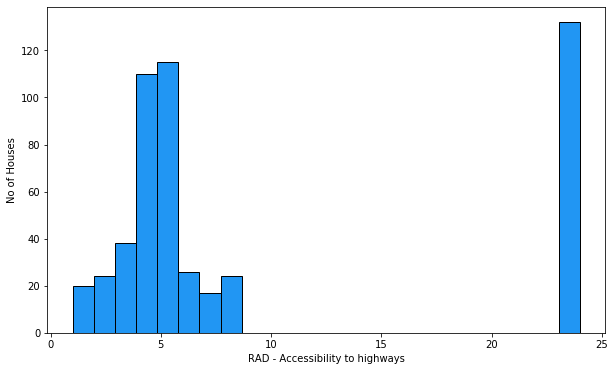

In [50]:
# histogram of RAD
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black', color='#2196f3')
plt.xlabel('RAD - Accessibility to highways')
plt.ylabel('No of Houses')
plt.show()

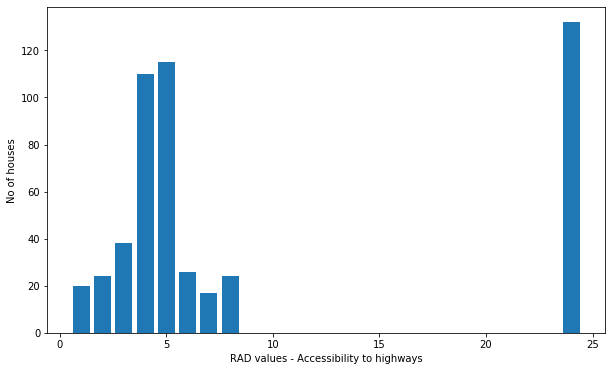

In [51]:
# Bar chart of RAD
plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency)
plt.xlabel('RAD values - Accessibility to highways')
plt.ylabel('No of houses')
plt.show()

# Value 24 is used for houses where .......

In [23]:
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

# Descriptive Statistics

In [53]:
# smallest house price
print(f'Smallest house price is {data["PRICE"].min()}')
# largest house price
print(f'Largest house price is {data["PRICE"].max()}')
# Mean house price
print(f'Mean house price is {data["PRICE"].mean()}')
# Median house price
print(f'Median house price is {data["PRICE"].median()}')
data['PRICE'].describe()

Smallest house price is 5.0
Largest house price is 50.0
Mean house price is 22.532806324110677
Median house price is 21.2


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

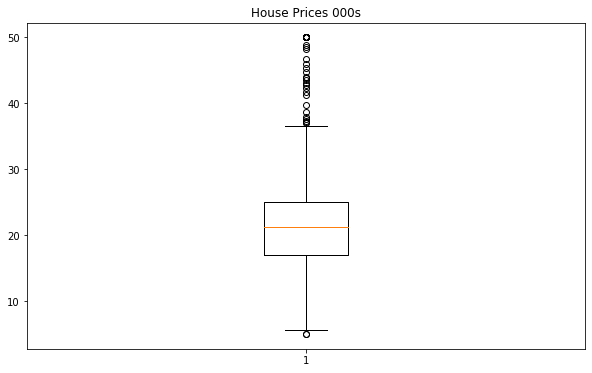

In [25]:
# Boxplot for house prices
plt.figure(figsize=(10,6))
plt.boxplot(data['PRICE'])
plt.title('House Prices 000s')
plt.show()

# Correlations

In [55]:
print(data['PRICE'].corr(data['RM'])) # correlation between House prices and No of rooms
print(data['PRICE'].corr(data['PTRATIO'])) # correlation between House prices and PTRatio
print(data['PTRATIO'].corr(data['PRICE'])) # correlation between PTRatio and House prices 

0.695359947071539
-0.5077866855375615
-0.5077866855375615


In [56]:
print(data.corr())
print(data.corr().shape)
type(data.corr()) # pandas dataframe

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

pandas.core.frame.DataFrame

In [57]:
mask = np.zeros_like(data.corr()) # numpy array
mask.shape # (14,14)

(14, 14)

In [60]:
triangle_indices = np.triu_indices_from(mask) # retreives indices from top triangle of the matrix - its a tuple
triangle_indices

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
        12, 12, 13], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
        13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
        12, 13, 13], dtype=int64))

In [62]:
mask[triangle_indices] = True

In [63]:
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


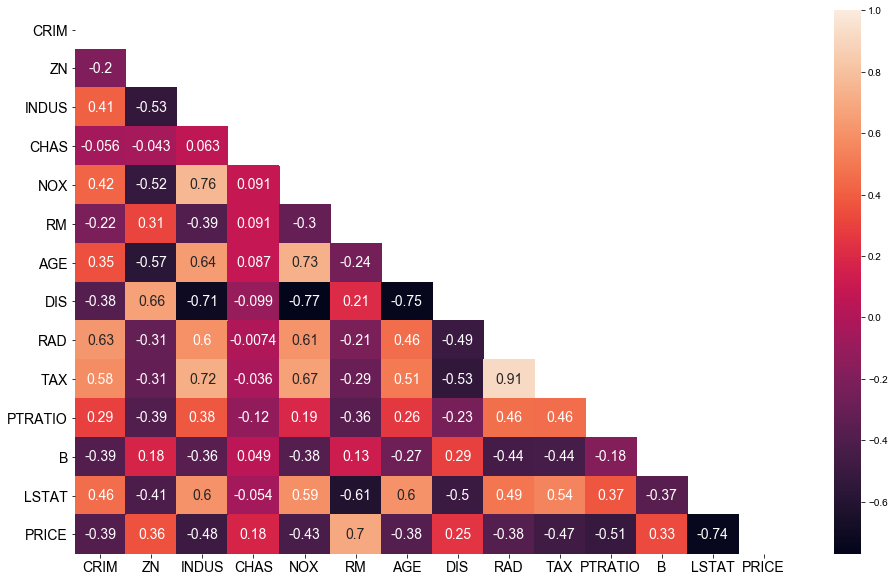

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

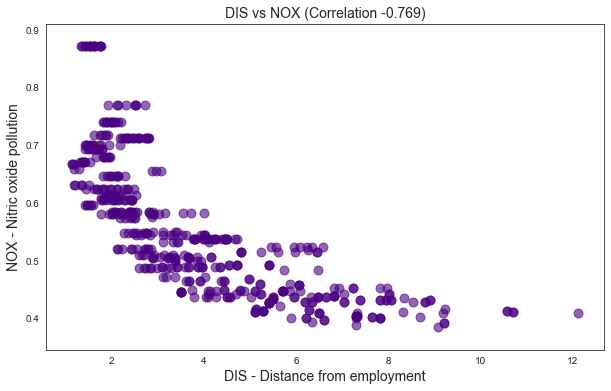

In [65]:
# Correlation Between DIS and NOX
nox_dis_corr = round(data["NOX"].corr(data["DIS"]),3)
plt.figure(figsize=(10,6))
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.6,s=80,color='indigo')
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric oxide pollution', fontsize=14)
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.show()

# As distance from industrial area increases, nitric oxide pollution decreases



C:\Users\Gagan Arora\.conda\envs\Custom\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


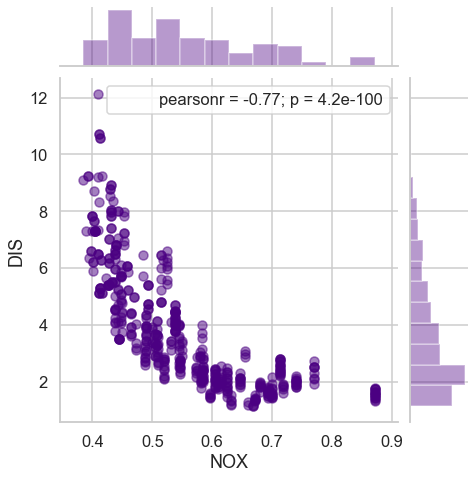

In [66]:
# Plot using seaborn
# plt.figure(figsize=(13,6))
# fig, ax = plt.subplots(figsize=(13,6))
sns.set()
sns.set_context('talk') # other options - notebook, paper poster
sns.set_style('whitegrid')
sns.jointplot(x=data['NOX'],y=data['DIS'],annot_kws=dict(stat='r'), height=7,
             color="indigo", joint_kws={'alpha':0.5}).annotate(stats.pearsonr)
plt.show()

<Figure size 936x432 with 0 Axes>

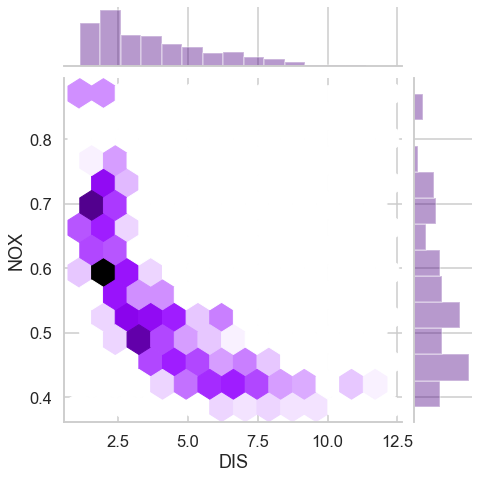

In [67]:
# 2nd way
plt.figure(figsize=(13,6))
sns.set() 
sns.set_context('talk') # other options - notebook, paper, poster
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], annot_kws=dict(stat="r"), height=7, 
              color='indigo', kind='hex')  # create a scatter plot in seaborn
plt.show()

C:\Users\Gagan Arora\.conda\envs\Custom\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


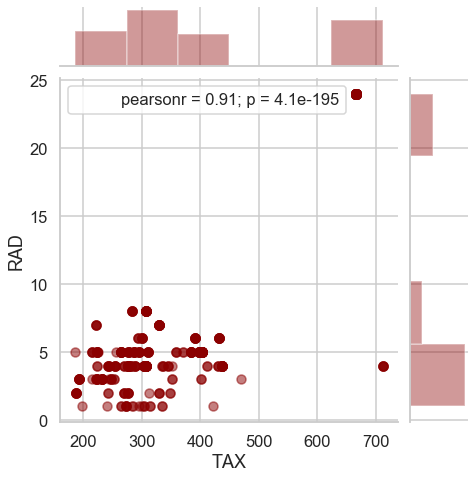

In [68]:
# Correlation between TAX and TAD
# TAX - full-value property-tax rate per $10,000
# RAD - index of accessibility to radial highways
# seaborn joint plot
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], annot_kws=dict(stat="r"), height=7, 
              color='darkred', joint_kws={"alpha":0.5}).annotate(stats.pearsonr)  # create a scatter plot in seaborn
plt.show()



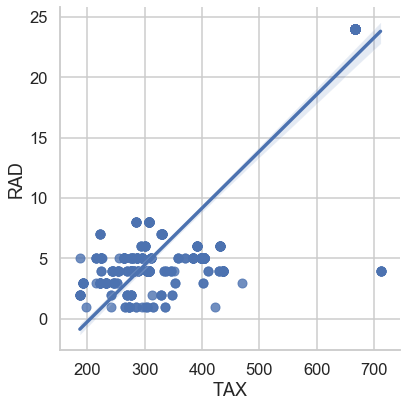

In [69]:
# Linear regression
sns.lmplot(x='TAX', y='RAD', data=data, height=6)
plt.show()

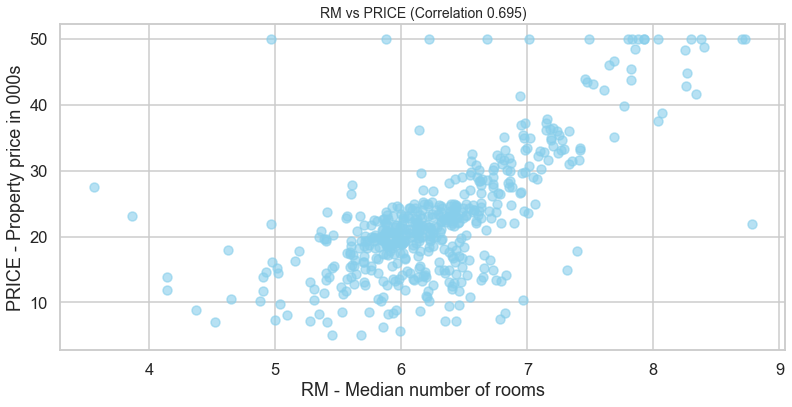

In [70]:
# Rooms and Price corelation

rm_tgt_corr = round(data['RM'].corr(data['PRICE']),3)
plt.figure(figsize=(13,6))
plt.xlabel('RM - Median number of rooms')
plt.ylabel('PRICE - Property price in 000s')
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.scatter(data['RM'],data['PRICE'],color='skyblue',alpha=0.6,s=80)
plt.show()

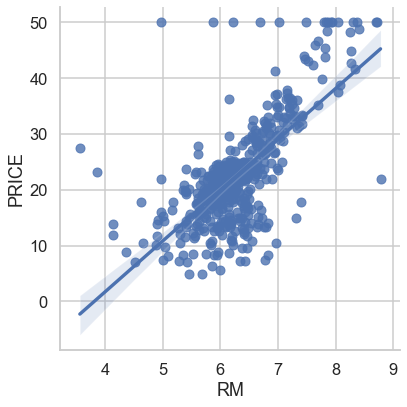

In [71]:

sns.lmplot(x='RM', y='PRICE', data=data, height=6)
plt.show()



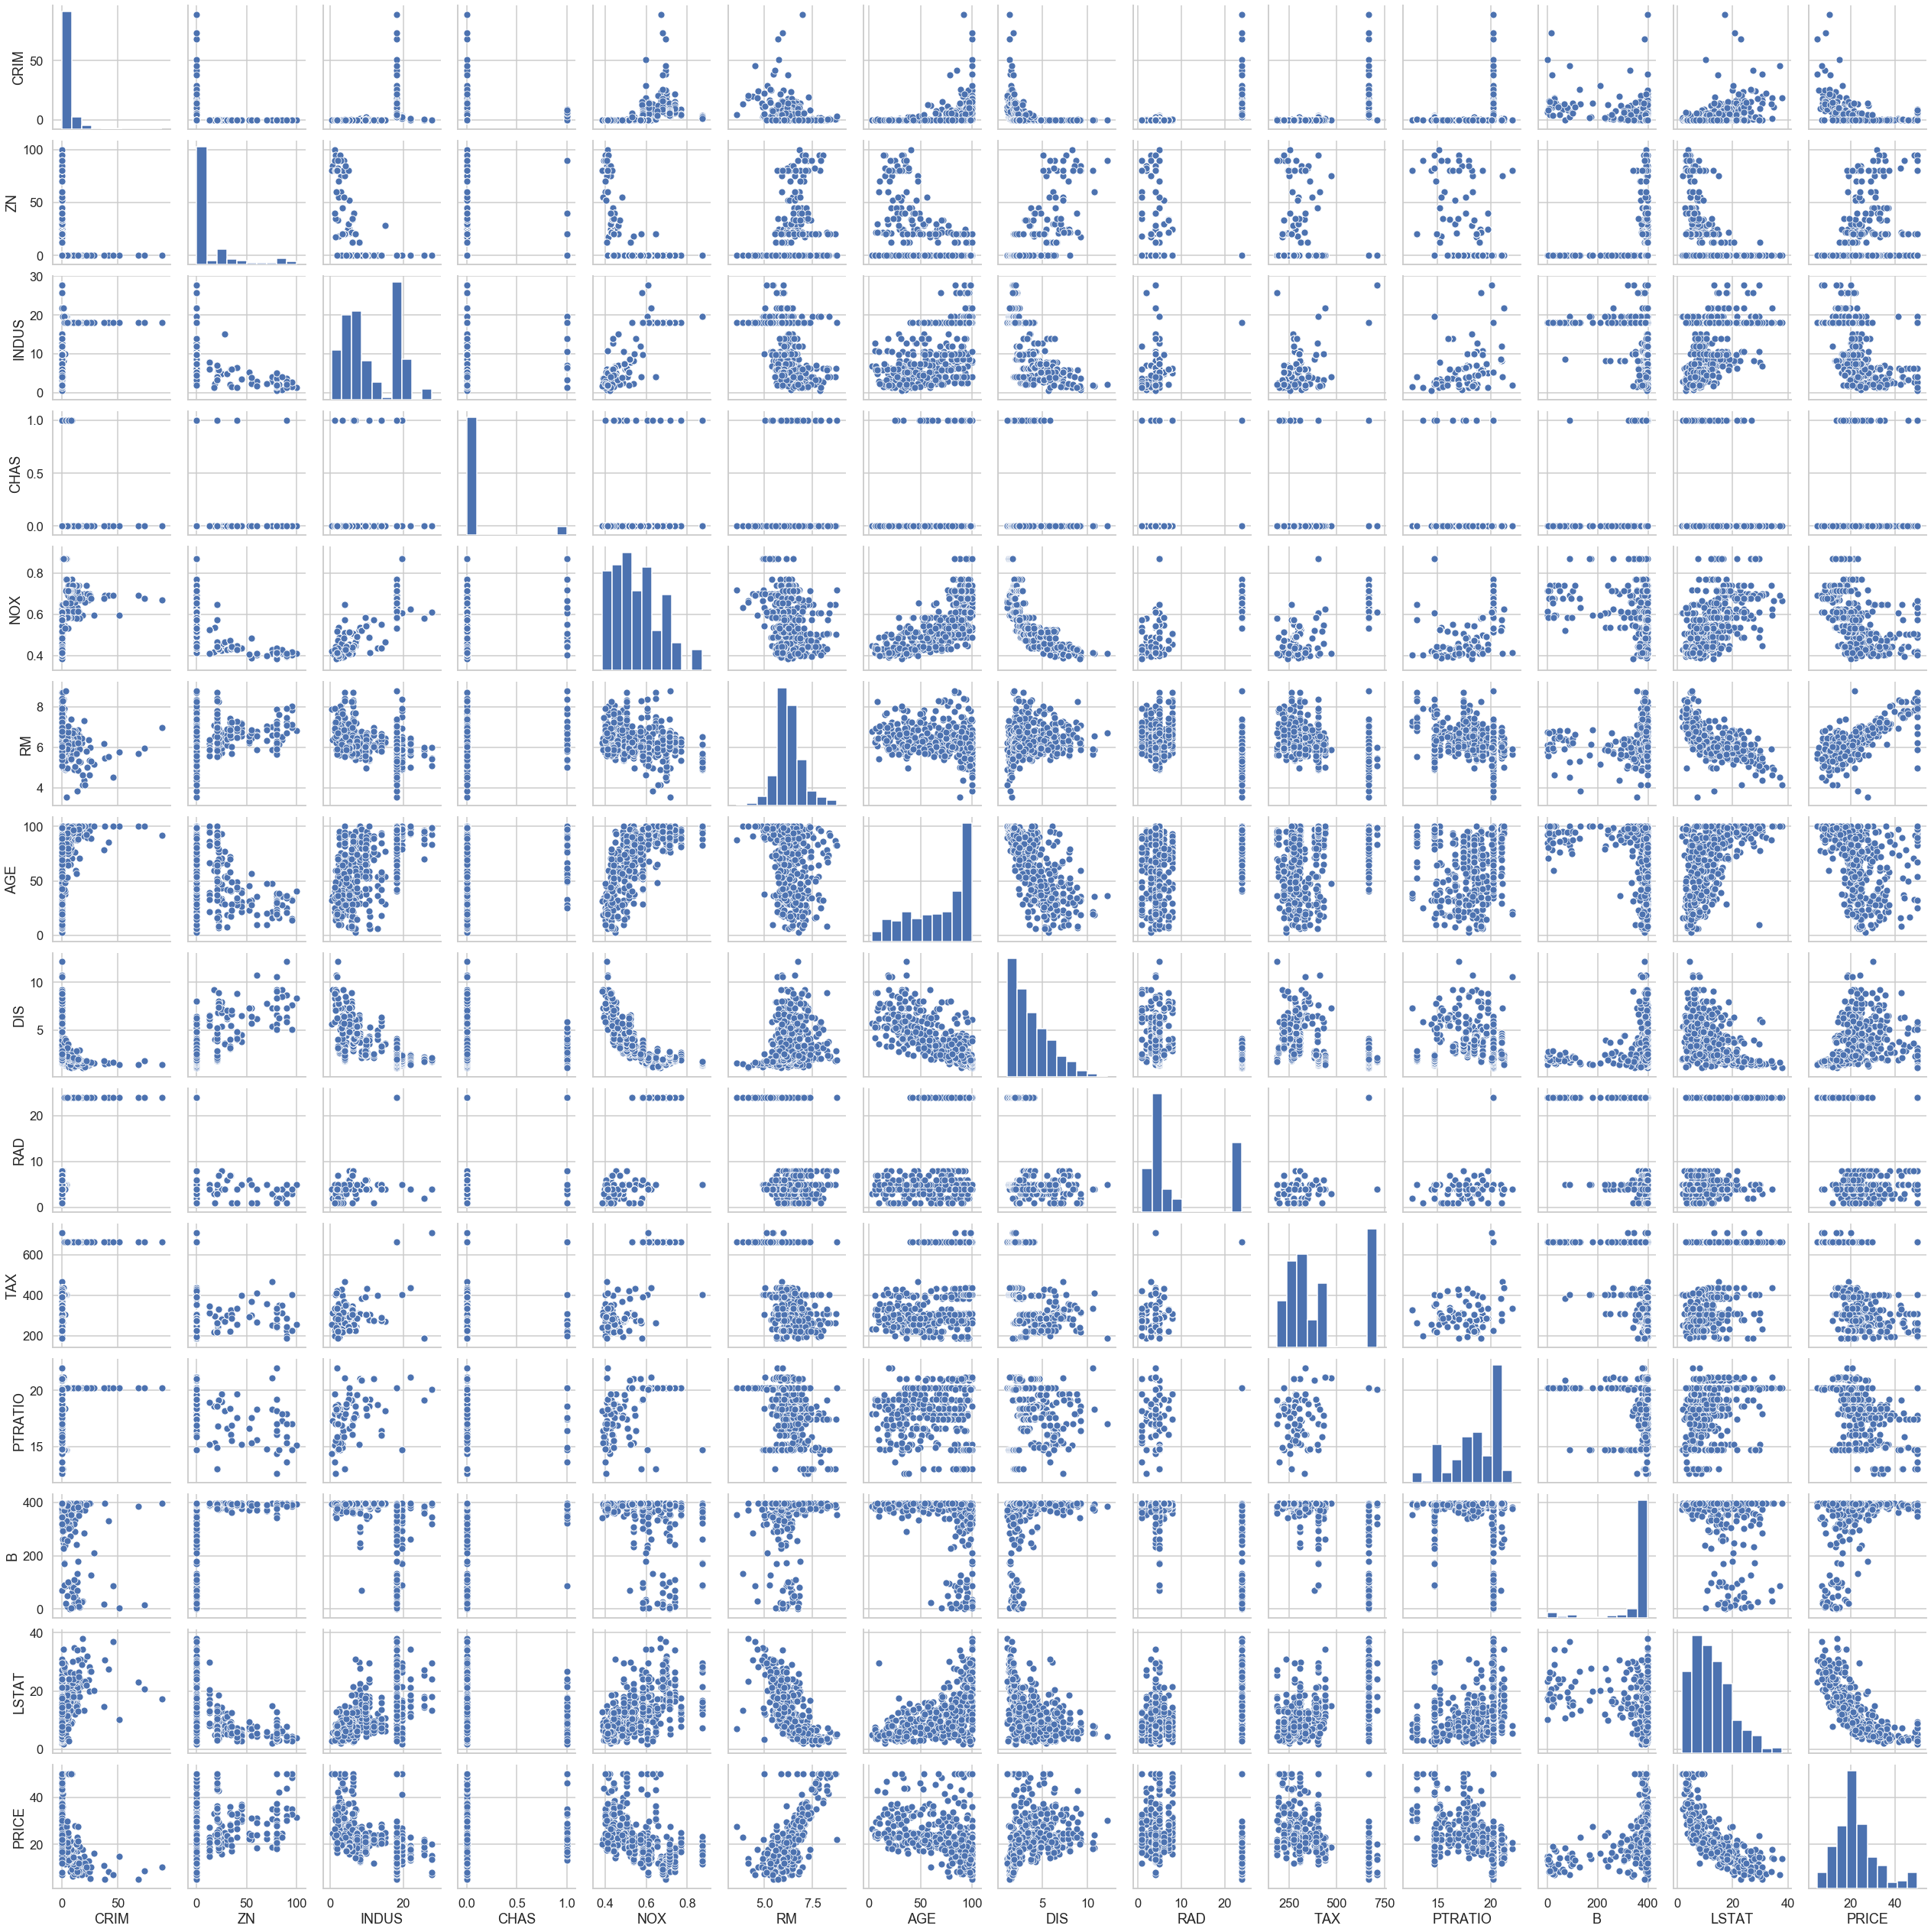

In [72]:
# all plots
sns.pairplot(data)
plt.show()

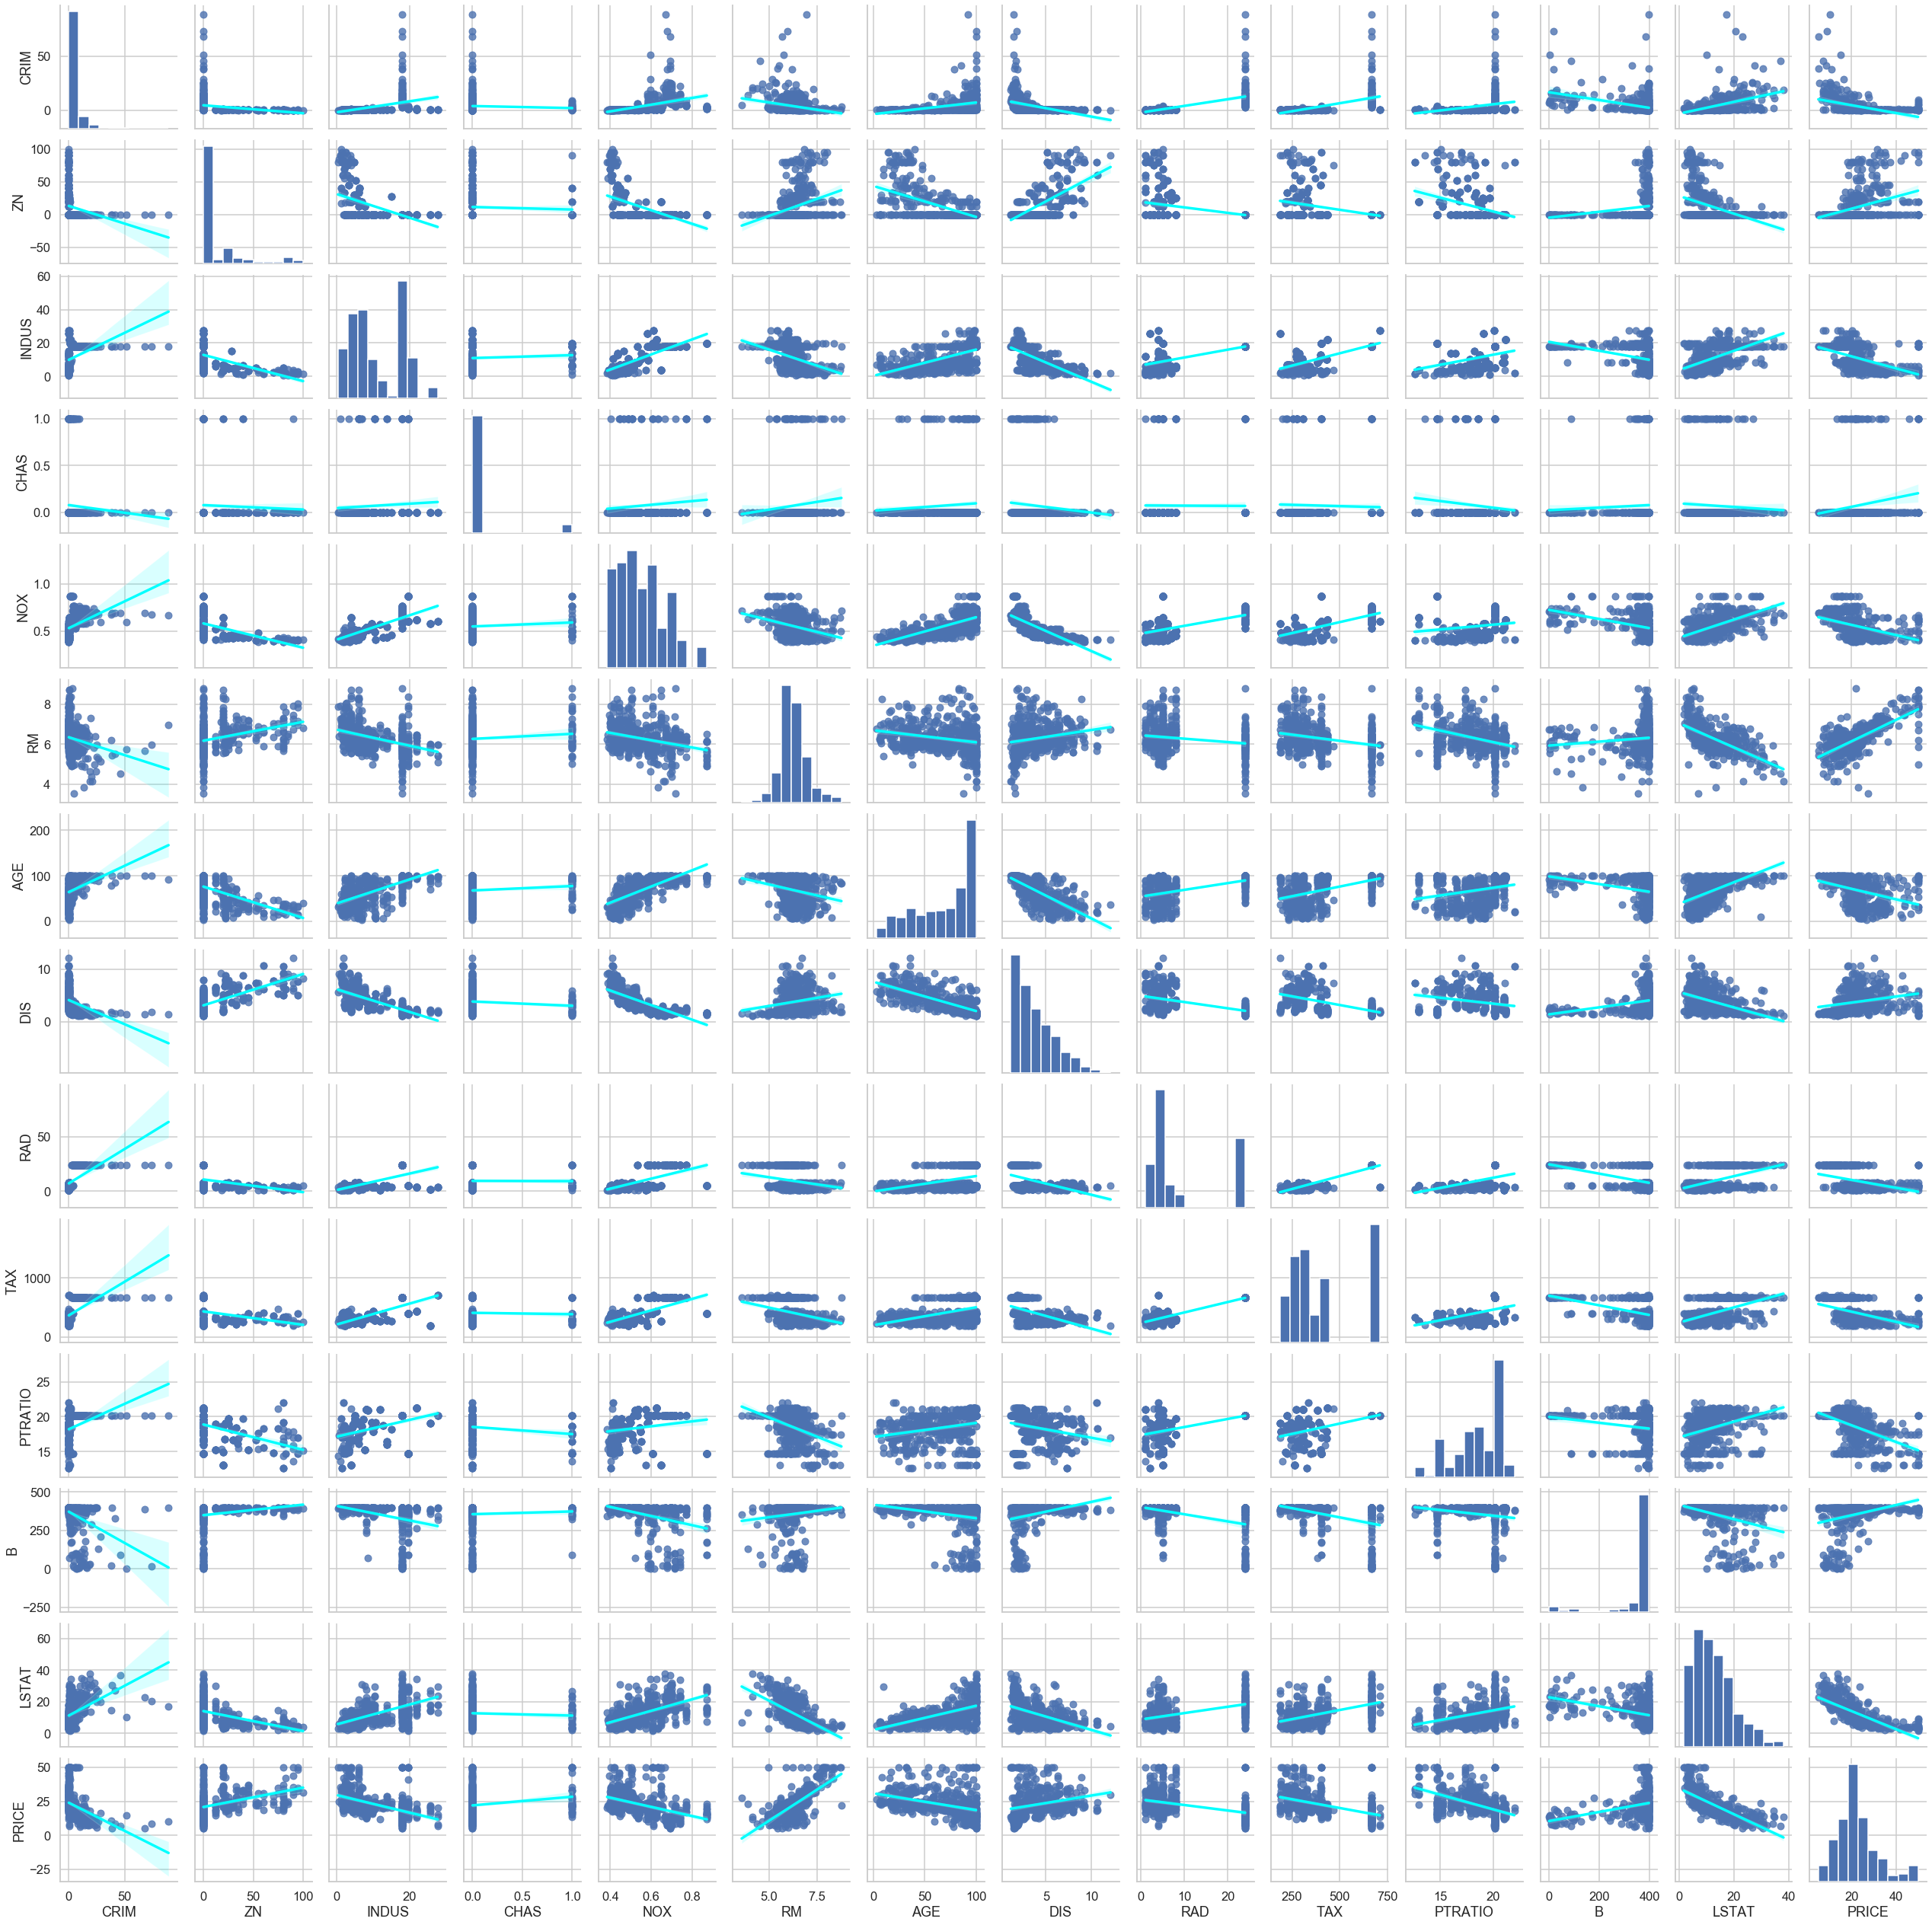

In [73]:
#
sns.pairplot(data,kind='reg', plot_kws={'line_kws':{'color':'cyan'}} )
plt.show()

# Training and Test Data Split

In [74]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=10)  # dataframes
print(f'% of training data set: {round(len(X_train)/len(features)*100,1)}')
print(f'% of test data set: {round(len(X_test)/len(features)*100,1)}')


% of training data set: 79.8
% of test data set: 20.2


# Multivariable Regression

In [76]:
regr = LinearRegression()

In [79]:
# dir(regr)
regr.fit(X_train,y_train)
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))
print('Intercept: ', regr.intercept_)
print(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115628
Intercept:  36.53305138282439
              coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626


# Data Transformations

In [85]:
# Skew of Normal Distribution is 0
data['PRICE'].skew()

1.1080984082549072

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64


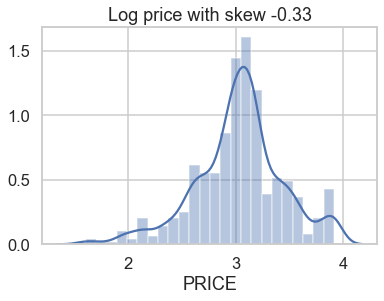

In [90]:
# As the data is skewed to the right,
# we can use log transformation which affects
# large values

y_log = np.log(data['PRICE']) # pandas series
print(y_log.head())

sns.distplot(y_log)
plt.title(f'Log price with skew {round(y_log.skew(),2)}')
plt.show()



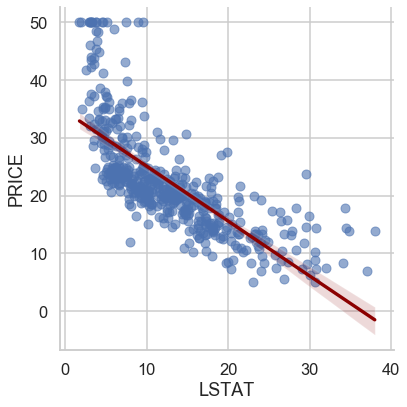

In [93]:
sns.lmplot(x='LSTAT',y='PRICE',data=data, height=6,
           scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

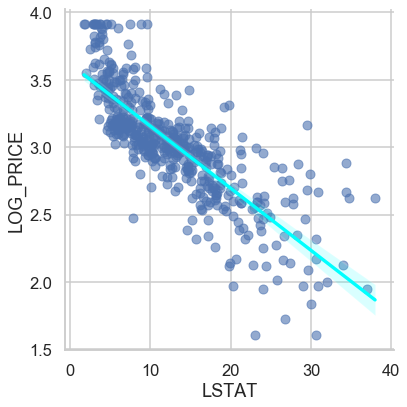

In [95]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data, height=6,
           scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

# Training and Test Dataset split for Log Transformation

In [96]:
prices = transformed_data['LOG_PRICE']
features = transformed_data.drop('LOG_PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=10)  # dataframes
print(f'% of training data set: {round(len(X_train)/len(features)*100,1)}')
print(f'% of test data set: {round(len(X_test)/len(features)*100,1)}')

% of training data set: 79.8
% of test data set: 20.2


In [98]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))
print('Intercept: ', regr.intercept_)
print(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260724
Intercept:  4.05994387177519
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390


# Evaluate Charles River Property Premium

In [110]:
# Coefficient is 0.080331
# property premium for property at charles river
coefficients = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print(f'Property premium for property at Charles River: ${round(np.e**coefficients["coef"].CHAS*1000,0)}')

Property premium for property at Charles River: $1084.0


# p values and evaluating coefficients

In [111]:
# if p-value < 0.05, then the result is statistically significant
# if p-value > 0.05, then the result is not statistically significant

In [116]:
X_incl_constant = sm.add_constant(X_train) # adds a column of 1 named const in front of the features

In [120]:
model = sm.OLS(y_train, X_incl_constant) # Ordinary Least squares
results = model.fit()
print(pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues,3)}))

             coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000
